<a href="https://colab.research.google.com/github/hauduong05/ML_basics/blob/main/ANN_ditgit_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# initial hyperparameters

input_size = 28*28
batch_size = 100
hidden_size = 100
num_classes = 10
n_epochs = 10
learning_rate = 0.01

In [19]:
# prepare data

train = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test, batch_size=batch_size, shuffle=True)

In [20]:
# buld model

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.linear = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc = nn.Linear(hidden_size, num_classes)
  def forward(self, x):
    out = self.linear(x)
    out = self.relu(out)
    out = self.fc(out)
    return out

In [21]:
model = NeuralNet(input_size, hidden_size, num_classes)
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [23]:
# train

train_loss = []
for epoch in range(n_epochs):
  for images, labels in train_loader:
    train_data = images.view(-1, 28*28)
    y_pred = model(train_data)
    optimizer.zero_grad()
    l = loss(y_pred, labels)
    train_loss.append(l)
    l.backward()
    optimizer.step()
  
    
  print(f'epoch {epoch+1} :  loss = {l.item():.3f}')

epoch 1 :  loss = 0.086
epoch 2 :  loss = 0.149
epoch 3 :  loss = 0.054
epoch 4 :  loss = 0.029
epoch 5 :  loss = 0.052
epoch 6 :  loss = 0.038
epoch 7 :  loss = 0.094
epoch 8 :  loss = 0.013
epoch 9 :  loss = 0.078
epoch 10 :  loss = 0.018


3


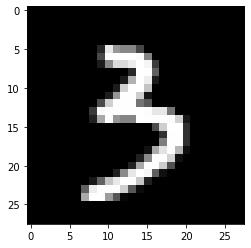

In [27]:
with torch.no_grad():
  for images, labels in test_loader:
    test = images.view(-1, 28*28)
    y_pred = model(test) 
    _, predict = torch.max(y_pred, 1)
    acc = predict.eq(labels).sum() / float(labels.shape[0])

plt.imshow(test[0].view(28, 28), cmap = 'gray')
print(predict[0].item())
plt.show()